<a href="https://colab.research.google.com/github/kairamilanifitria/Bootcamp-NLP/blob/main/19082024_K_Means_Hierarchical_Clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Generate Data

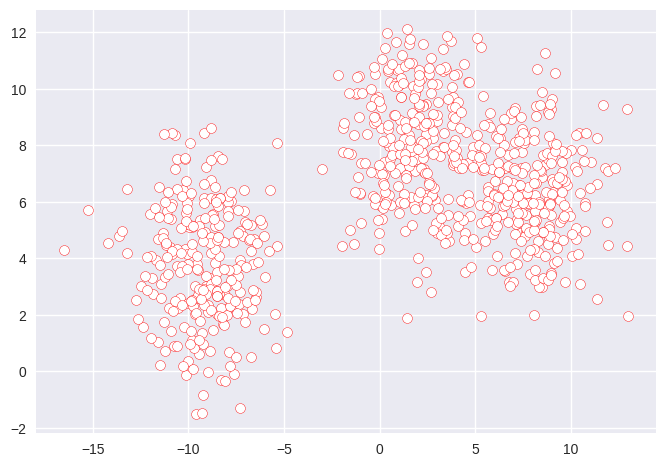

In [ ]:
# create dataset
X, _ = make_blobs(n_samples=800, n_features=2,
                  centers=3, cluster_std=1.9,
                  shuffle=True, random_state=20)

# plot
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='red', marker='o', s=50)

plt.show()

## Model Data

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', max_iter=300, random_state=20)
y_km = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
preview_cluster_data = pd.DataFrame({
    'centroid pada fitur 1 (sumbu x)':km.cluster_centers_[:,0],
    'centroid pada fitur 2 (sumbu y)':km.cluster_centers_[:,1],
    'cluster':list(range(3))
})
preview_cluster_data

,centroid pada fitur 1 (sumbu x),centroid pada fitur 2 (sumbu y),cluster
0,-9.255197,3.811364,0
1,7.891445,6.268664,1
2,1.698130,8.100706,2


In [ ]:
preview_data = pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:,1],
    'cluster':y_km
})
preview_data

,fitur 1,fitur 2,cluster
0,1.543633,7.295645,2
1,8.633911,7.300079,1
2,3.759723,8.726375,2
3,6.549432,3.562563,1
4,-10.372268,4.259737,0
...,...,...,...
795,4.241809,9.187808,2
796,5.606792,5.863525,1
797,1.317934,7.469066,2
798,-6.501927,2.524086,0


## Plot Cluster

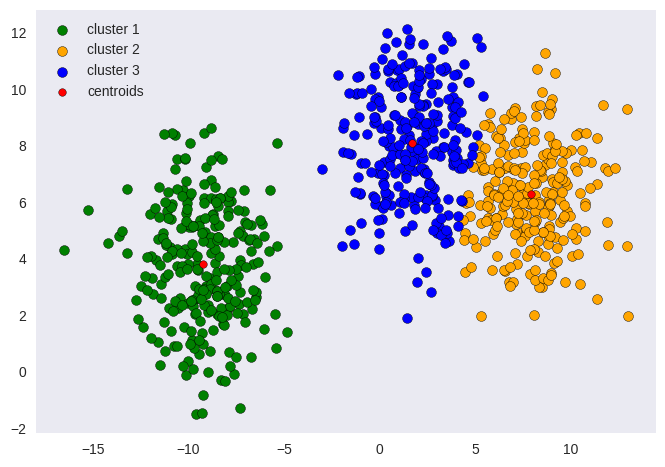

In [ ]:
# plot the 3 clusters

# cluster berwarna hijau atau cluster 1
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna orange atau cluster 2
plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 2'
)

# cluster berwarna biru atau cluster 3
plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

## Elbow Method

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    # Inertia is the sum of squared distances of samples to their closest cluster center.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

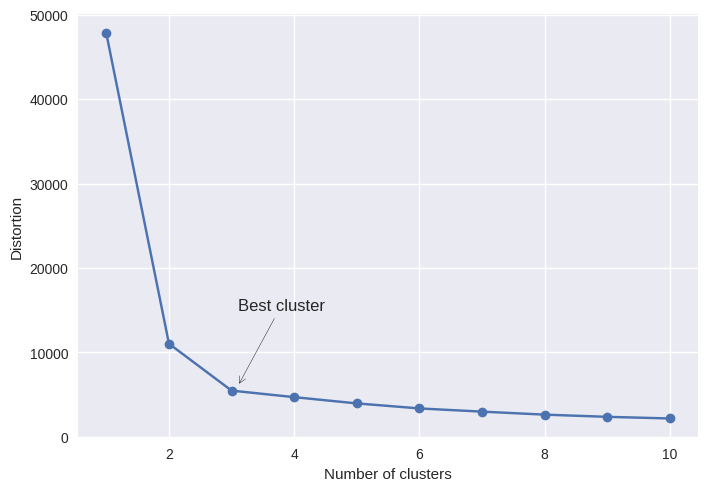

In [ ]:
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.annotate('Best cluster', xy=(3.1, 6000), xytext=(3.1, 15000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Elbow method shows that the best K is 2 (probably 3 can be better)

# Aglomerative Clustering


## Small Data

### Generate Data

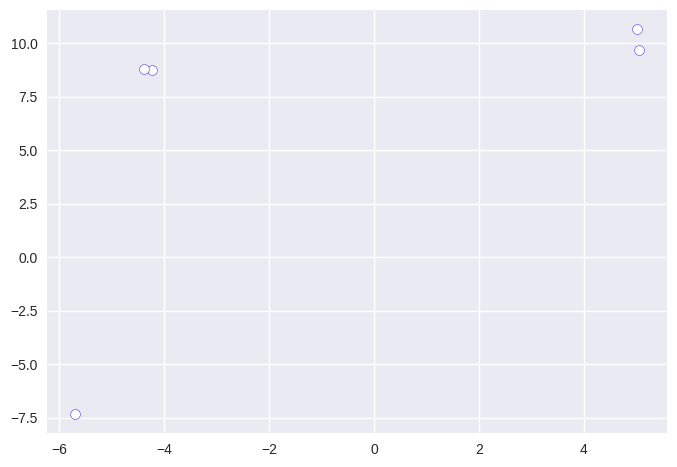

In [ ]:
# create dataset
X, _ = make_blobs(n_samples=5, n_features=2,
                  centers=3, cluster_std=0.5,
                  shuffle=True, random_state=31)

# plot
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='blue', marker='o', s=50)

plt.show()

### Model Data

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

### Plot Dendogram

In [ ]:
pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:,1],
    'index':list(range(0,len(X)))
})

,fitur 1,fitur 2,index
0,5.053458,9.694379,0
1,-5.692724,-7.327352,1
2,-4.238378,8.766598,2
3,5.017699,10.662078,3
4,-4.388223,8.780513,4


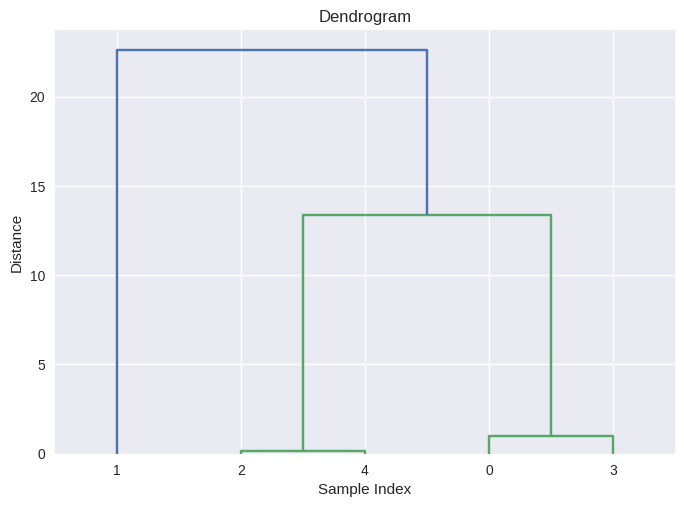

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# Generate the linkage matrix
linkage_matrix = linkage(X, method='ward')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.show()

### Plot Cluster

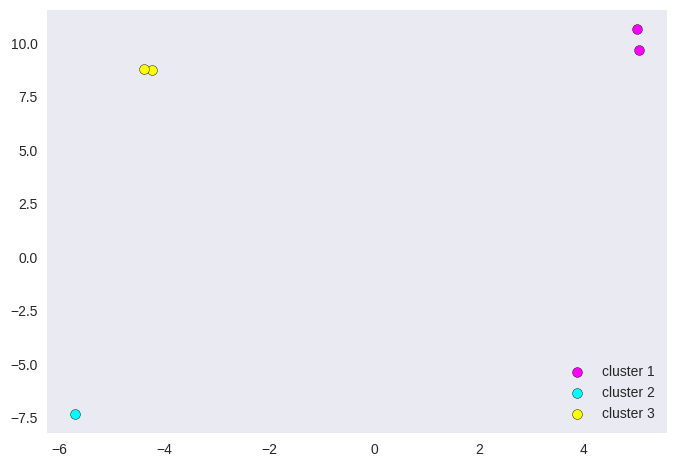

In [ ]:
# plot the 3 clusters

# cluster berwarna magenta atau cluster 1
plt.scatter(
    X[y_agg == 0, 0], X[y_agg == 0, 1],
    s=50, c='magenta', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna cyan atau cluster 2
plt.scatter(
    X[y_agg == 1, 0], X[y_agg == 1, 1],
    s=50, c='cyan', edgecolor='black',
    label='cluster 2'
)

# cluster berwarna kuning atau cluster 3
plt.scatter(
    X[y_agg == 2, 0], X[y_agg == 2, 1],
    s=50, c='yellow', edgecolor='black',
    label='cluster 3'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

## More Data!

### Generate Data

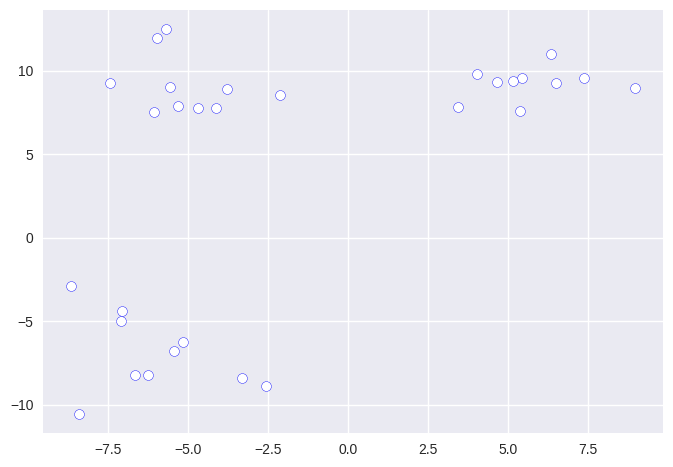

In [ ]:
# create dataset
X, _ = make_blobs(n_samples=30, n_features=2,
                  centers=3, cluster_std=1.8,
                  shuffle=True, random_state=31)

# plot
plt.scatter(X[:, 0], X[:, 1], c='white', edgecolor='blue', marker='o', s=50)

plt.show()

### Model Data

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

### Plot Dendogram

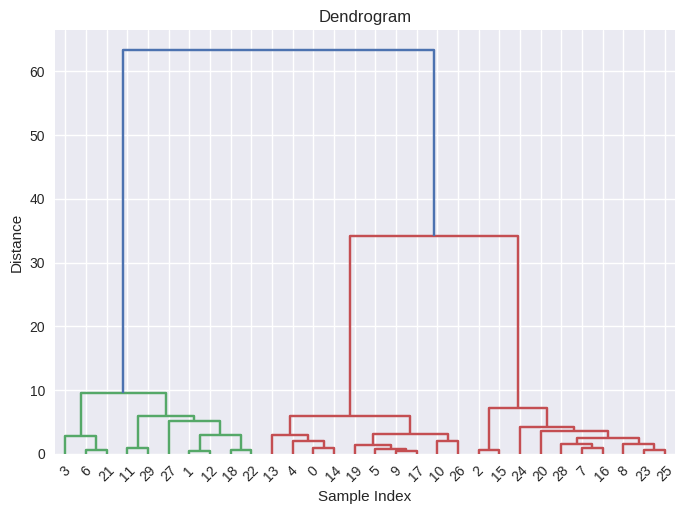

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# Generate the linkage matrix
linkage_matrix = linkage(X, method='ward')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.show()

### Plot Cluster

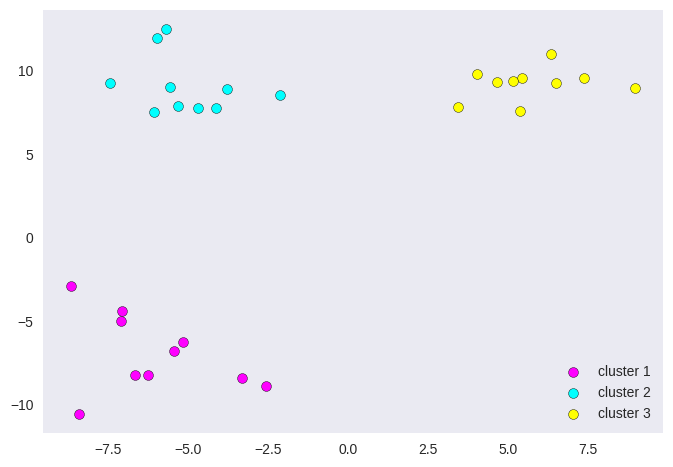

In [ ]:
# plot the 3 clusters

# cluster berwarna magenta atau cluster 1
plt.scatter(
    X[y_agg == 0, 0], X[y_agg == 0, 1],
    s=50, c='magenta', edgecolor='black',
    label='cluster 1'
)

# cluster berwarna cyan atau cluster 2
plt.scatter(
    X[y_agg == 1, 0], X[y_agg == 1, 1],
    s=50, c='cyan', edgecolor='black',
    label='cluster 2'
)

# cluster berwarna kuning atau cluster 3
plt.scatter(
    X[y_agg == 2, 0], X[y_agg == 2, 1],
    s=50, c='yellow', edgecolor='black',
    label='cluster 3'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

# DBSCAN

In [ ]:
plt.style.use('default')

## Generate Data

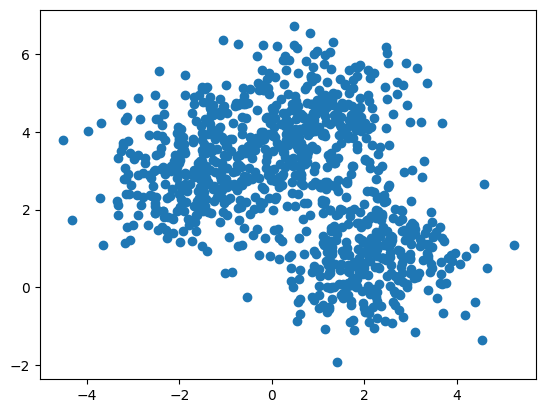

In [ ]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

#plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Model Data

In [ ]:
#do DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

You can explore more here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

## Plot Cluster

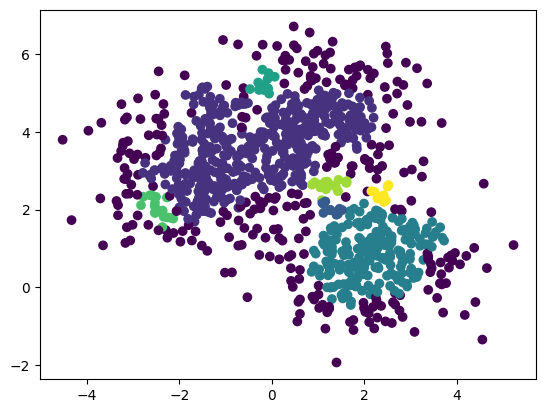

In [ ]:
#plot the result
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

## Plot lebih detail

In [ ]:
y_db = dbscan.labels_

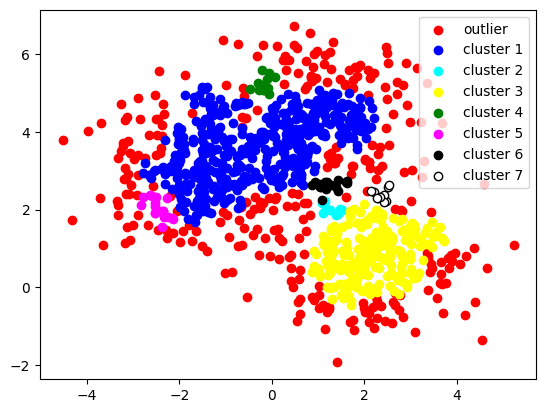

In [ ]:
#plot the result
plt.scatter(X[y_db==-1,0],X[y_db==-1,1], c='red', label='outlier')
plt.scatter(X[y_db==0,0],X[y_db==0,1], c='blue', label='cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1], c='cyan', label='cluster 2')
plt.scatter(X[y_db==2,0],X[y_db==2,1], c='yellow', label='cluster 3')
plt.scatter(X[y_db==3,0],X[y_db==3,1], c='green', label='cluster 4')
plt.scatter(X[y_db==4,0],X[y_db==4,1], c='magenta', label='cluster 5')
plt.scatter(X[y_db==5,0],X[y_db==5,1], c='black', label='cluster 6')
plt.scatter(X[y_db==6,0],X[y_db==6,1], c='white', edgecolor='black', label='cluster 7')
plt.legend(scatterpoints=1)
plt.show()